<center> Maestría en Cómputo Estadístico 2025 <center>
<center> Procesamiento de Texto e Imágenes con Deep Learning  <center>
Sesión 4 - Aprendizaje Profundo
<center> Miguel Ángel Álvarez Carmona <center>


Investigador

SECIHTI - CIMAT Mty

miguel.alvarez@cimat.mx

In [ ]:
!pip install tensorflow
!||pip install plotly
!pip install cufflinks

/bin/bash: -c: line 1: syntax error near unexpected token `||'
/bin/bash: -c: line 1: `||pip install plotly'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.5 MB/s eta 0:00:00


In [ ]:
from __future__ import print_function
import tensorflow as tf
tf.config.run_functions_eagerly(True)


from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb

#from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
#si usamos colab
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt_tab')
import matplotlib.pyplot as plt

print('Cargando datos...')


data = pd.read_csv('drive/MyDrive/MeIA_2025/corpusTASS-2020/train.tsv', sep='\t')
data_dev = pd.read_csv('drive/MyDrive/MeIA_2025/corpusTASS-2020/dev.tsv', sep='\t')

# Diccionario de mapeo de etiquetas
mapeo_etiquetas = {'N': 0, 'NEU': 1, 'P': 2}

# Transformación de la columna "etiqueta"
data['etiqueta_num'] = data['etiqueta'].map(mapeo_etiquetas)
data_dev['etiqueta_num'] = data_dev['etiqueta'].map(mapeo_etiquetas)

x_train, y_train = data['texto'], data['etiqueta_num']
x_test, y_test =data_dev['texto'], data_dev['etiqueta_num']

print(len(x_train), 'ejemplos de entrenamiento')
print(len(x_test), 'ejemplos de prueba')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Cargando datos...
4802 ejemplos de entrenamiento
2443 ejemplos de prueba


In [ ]:
set(y_test)

{0, 1, 2}

In [ ]:
# visualizar el dataset de entrenamiento
data

,id,texto,etiqueta,pais,etiqueta_num
0,768512386269638656,@morbosaborealis jajajaja... eso es verdad... ...,N,es,0
1,768529956162924544,@Adriansoler espero y deseo que el interior te...,NEU,es,1
2,768557093955698688,"comprendo que te molen mis tattoos, pero no te...",NEU,es,1
3,770616744192929792,"Mi última partida jugada, con Sona support. La...",P,es,2
4,769959690092642304,Tranquilos que con el.dinero de Camacho seguro...,P,es,2
...,...,...,...,...,...
4797,817849572865273857,@ladelbosque29 acude al próximo llamado que ha...,NEU,mx,1
4798,800007284491309060,@Dianybony jajajaja claro que no amor!! te amo...,P,mx,2
4799,817236774816718848,"Hoy le pedí a Dios una señal realmente obvia, ...",P,mx,2
4800,816175658250420224,El reboot de Jumanji puede romper mi corazón x...,N,mx,0


In [ ]:
# visualizar el dataset de validacion
data_dev

,id,texto,etiqueta,pais,etiqueta_num
0,773238965709176832,@chefidiaz no seas muy dura,N,es,0
1,770702799470489601,@lantoli podemos usar el término.equipo pepino,NEU,es,1
2,770238084764041217,Como destrozaba el puto movil ahora mismo,N,es,0
3,770222346829520896,@YG__GF me ofrecería pero gerald es demasiado ...,NEU,es,1
4,770560227531948032,@omixam no creo que hayan diseñado una tipo pr...,N,es,0
...,...,...,...,...,...
2438,819221868574085121,@Natsflorees no todo es tan malo,NEU,mx,1
2439,818686841381601280,"@Richo_Amezquita a ver, ya, no seas así",N,mx,0
2440,819012309880360960,ocupo el gym en serio #VideoMTV2016 Abraham Mateo,NEU,mx,1
2441,819306396378275840,Empezar de nuevo con la dieta es tan difícil,N,mx,0


# Bow

### División de muestras en entrenamiento (train) y validación (dev)

  *   Elemento de la lista
  *   Elemento de la lista


  En caso que no tengamos un dataset para validación, podemos dividir nuestro conjunto de entrenamiento en 2 subconjuntos. Tambien podemos hacer multiples divisiones para entrenar y validar el modelo en varias particiones del conjunto de entrenamiento. Abajo un ejemplo de como realizar la patición.

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data['texto'],
                                                    data['etiqueta'],
                                                    test_size=0.3,
                                                    random_state=0)
print(len(X_train))

3361


In [ ]:
X_train, y_train = data['texto'], data['etiqueta']
X_test, y_test =data_dev['texto'], data_dev['etiqueta']

print('Tamaño del conjunto de entrenamiento:',len(X_train), len(y_train))
print('Tamaño del conjunto de validación:',len(X_test), len(y_test))
print(X_train)
print(y_train)

Tamaño del conjunto de entrenamiento: 4802 4802
Tamaño del conjunto de validación: 2443 2443
0       @morbosaborealis jajajaja... eso es verdad... ...
1       @Adriansoler espero y deseo que el interior te...
2       comprendo que te molen mis tattoos, pero no te...
3       Mi última partida jugada, con Sona support. La...
4       Tranquilos que con el.dinero de Camacho seguro...
                              ...                        
4797    @ladelbosque29 acude al próximo llamado que ha...
4798    @Dianybony jajajaja claro que no amor!! te amo...
4799    Hoy le pedí a Dios una señal realmente obvia, ...
4800    El reboot de Jumanji puede romper mi corazón x...
4801    @Djrossana que tengan un lindo martes y que to...
Name: texto, Length: 4802, dtype: object
0         N
1       NEU
2       NEU
3         P
4         P
       ... 
4797    NEU
4798      P
4799      P
4800      N
4801      P
Name: etiqueta, Length: 4802, dtype: object


¿Cuáles son los 20 tokens más frecuentes (únicos) en el texto? ¿Cuál es su frecuencia?

In [ ]:
from collections import Counter
def masFrecuentes():
    text = ' '.join(data['texto'])
    tokens=nltk.word_tokenize(text)
    cnt =Counter(tokens).most_common(20)
    return cnt

#print(' '.join(data['texto']))
masFrecuentes()

[('@', 3171),
 (',', 2642),
 ('que', 2458),
 ('de', 2456),
 ('y', 1845),
 ('a', 1578),
 ('.', 1512),
 ('la', 1454),
 ('no', 1441),
 ('!', 1352),
 ('me', 1238),
 ('el', 1198),
 ('en', 1163),
 ('es', 956),
 ('un', 772),
 ('lo', 706),
 ('mi', 658),
 ('por', 609),
 ('se', 600),
 ('con', 590)]

In [ ]:
data_neg=len(data[data['etiqueta'] == 'N'])
data_neu=len(data[data['etiqueta'] == 'NEU'])
data_pos=len(data[data['etiqueta'] == 'P'])
print (f'Clase Negativa {(data_neg)}: {(data_neg)/len(data)} %')
print (f'Clase Neutra {(data_neu)}: {(data_neu)/len(data)} %')
print (f'Clase Positiva {data_pos}: {(data_pos)/len(data)} %')

Clase Negativa 1885: 0.3925447730112453 %
Clase Neutra 1523: 0.31715951686797167 %
Clase Positiva 1394: 0.29029571012078303 %


¿Qué porcentaje de los documentos en el conjunto de prueba son positivos, negativos y neutros?

In [ ]:
data_dev_neg=len(data_dev[data_dev['etiqueta'] == 'N'])
data_dev_neu=len(data_dev[data_dev['etiqueta'] == 'NEU'])
data_dev_pos=len(data_dev[data_dev['etiqueta'] == 'P'])
print (f'Clase Negativa {(data_dev_neg)}: {(data_dev_neg)/len(data_dev)} %')
print (f'Clase Neutra {(data_dev_neu)}: {(data_dev_neu)/len(data_dev)} %')
print (f'Clase Positiva {data_dev_pos}: {(data_dev_pos)/len(data_dev)} %')

Clase Negativa 951: 0.3892754809660254 %
Clase Neutra 793: 0.32460090053213264 %
Clase Positiva 699: 0.286123618501842 %


## Clasificación de textos

Ajustar y transformar los datos de entrenamiento `X_train` utilizando un `count_vectorizer` con parámetros predeterminados.

Luego, ajustar un modelo de clasificación Naive Bayes multinomial. Calcular medidas de exactitud, presición, recall y f1-score usando los datos de validación transformados.

In [ ]:
# importamos librerías necesarias
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC #maquinas de vectores de soporte
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

vect = CountVectorizer().fit(X_train)
X_train_vectorized=vect.transform(X_train)
X_train_vectorized.shape

clf=MultinomialNB()

clf.fit(X_train_vectorized, y_train)

X_test_vectorized=vect.transform(X_test)
X_test_vectorized.shape

predictions = clf.predict(X_test_vectorized)
print(len(predictions))
print(predictions)

2443
['N' 'N' 'N' ... 'NEU' 'N' 'N']


In [ ]:
# podemos calcular las métricas por separado
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

scores=[]
scores.append(accuracy_score(y_test,predictions))
scores.append(precision_score(y_test,predictions, average='macro'))
scores.append(recall_score(y_test,predictions, average='macro'))
scores.append(f1_score(y_test,predictions, average='macro'))
print ('Métricas de clasificación',scores)
print ('----------------------------------------------------------------')
print ('Reporte de clasificación')
print ('----------------------------------------------------------------')
# podemos sacar un reporte de clasificación
target_names = ['negativo', 'neutro', 'positivo']
print(classification_report(y_test, predictions, target_names=target_names))
print ('----------------------------------------------------------------')
print ('Matriz de confusión')
print ('----------------------------------------------------------------')
# podemos sacar la matriz de confusión
matriz=confusion_matrix(y_test, predictions)


print(matriz)
# fig, ax = plt.subplots(figsize=(8, 8))
# disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='vertical')
# plt.title("Matriz de Confusión")
# plt.show()

Métricas de clasificación [0.5313139582480557, 0.5391568854130901, 0.5091271676015149, 0.4944318904099667]
----------------------------------------------------------------
Reporte de clasificación
----------------------------------------------------------------
              precision    recall  f1-score   support

    negativo       0.51      0.82      0.63       951
      neutro       0.50      0.24      0.33       793
    positivo       0.61      0.46      0.52       699

    accuracy                           0.53      2443
   macro avg       0.54      0.51      0.49      2443
weighted avg       0.53      0.53      0.50      2443

----------------------------------------------------------------
Matriz de confusión
----------------------------------------------------------------
[[783  95  73]
 [465 193 135]
 [276 101 322]]


#Multilayer

In [ ]:
print('Cargando datos...')


data = pd.read_csv('drive/MyDrive/MeIA_2025/corpusTASS-2020/train.tsv', sep='\t')
data_dev = pd.read_csv('drive/MyDrive/MeIA_2025/corpusTASS-2020/dev.tsv', sep='\t')

# Diccionario de mapeo de etiquetas
mapeo_etiquetas = {'N': 0, 'NEU': 1, 'P': 2}

# Transformación de la columna "etiqueta"
data['etiqueta_num'] = data['etiqueta'].map(mapeo_etiquetas)
data_dev['etiqueta_num'] = data_dev['etiqueta'].map(mapeo_etiquetas)

x_train, y_train = data['texto'], data['etiqueta_num']
x_test, y_test =data_dev['texto'], data_dev['etiqueta_num']

print(len(x_train), 'ejemplos de entrenamiento')
print(len(x_test), 'ejemplos de prueba')

Cargando datos...
4802 ejemplos de entrenamiento
2443 ejemplos de prueba


In [ ]:
# Tokenizar los textos
print('train0',x_train[0])
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

# Obtener la longitud máxima de secuencia
max_sequence_length = max(len(sequence) for sequence in train_sequences)

# Rellenar las secuencias para que todas tengan la misma longitud
x_train = sequence.pad_sequences(train_sequences, maxlen=max_sequence_length)
x_test = sequence.pad_sequences(test_sequences, maxlen=max_sequence_length)
print('train0',x_train[0])
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

train0 @morbosaborealis jajajaja... eso es verdad... aquí no hay uno cuerdo 
train0 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0 4562  176   44   10  122
  146    4   46  102 4563]
x_train shape: (4802, 33)
x_test shape: (2443, 33)
y_train shape: (4802,)
y_test shape: (2443,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

# Parámetros de ejemplo
input_dim = len(x_train[0]) # número de características de entrada

num_classes = 3  # número de clases de salida

# Definición del modelo
model = Sequential()
model.add(InputLayer(input_shape=(input_dim,)))

# 5 capas ocultas de 10 neuronas con activación ReLU
for _ in range(10):
    model.add(Dense(10, activation='relu'))

# Capa de salida
model.add(Dense(num_classes, activation='softmax'))

# Compilación del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar resumen de la arquitectura
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 10)             │           340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,363 (5.32 KB)

 Trainable params: 1,363 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

33
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


128/128 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - accuracy: 0.3266 - loss: 10.1763 - val_accuracy: 0.2829 - val_loss: 1.7483
Epoch 2/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.3556 - loss: 1.2923 - val_accuracy: 0.3162 - val_loss: 1.3568
Epoch 3/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - accuracy: 0.3701 - loss: 1.1828 - val_accuracy: 0.2913 - val_loss: 1.3839
Epoch 4/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.4005 - loss: 1.1107 - val_accuracy: 0.2275 - val_loss: 1.4912
Epoch 5/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.4110 - loss: 1.1033 - val_accuracy: 0.4244 - val_loss: 1.2008

Test loss: 1.1826, Test accuracy: 0.3430
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.39      0.57      0.46       951
           1       0.26      0.02      0.03       793
           2       0.28      0.41      0.33       699

    accuracy                

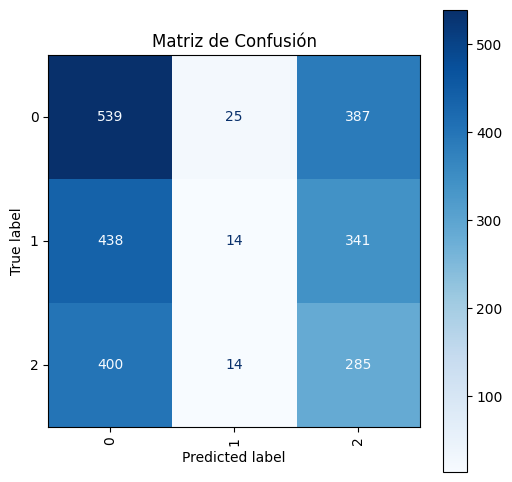

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# ➕ 1. Definición del modelo (MLP con 5 capas ocultas de 10 neuronas)
input_dim = len(x_train[0])     # ajusta según tus datos
print(input_dim)
num_classes = 3
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(input_dim,)))
for _ in range(10):
    model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# ➕ 2. Compilación del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #loss = 'categorical_crossentropy',
              metrics=['accuracy'])

# ➕ 3. Entrenamiento: 5 épocas
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.15,
                    verbose=1)  # ejemplo con split de validación

# ➕ 4. Evaluación final en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

# ➕ 5. Predicciones y obtención de etiquetas
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Asegurar que y_test esté en formato entero
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# ➕ 6. Métricas y matriz de confusión
print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(y_true))
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='vertical')
plt.title('Matriz de Confusión')
plt.show()


#CNN

In [ ]:
print('Cargando datos...')


data = pd.read_csv('drive/MyDrive/MeIA_2025/corpusTASS-2020/train.tsv', sep='\t')
data_dev = pd.read_csv('drive/MyDrive/MeIA_2025/corpusTASS-2020/dev.tsv', sep='\t')

# Diccionario de mapeo de etiquetas
mapeo_etiquetas = {'N': 0, 'NEU': 1, 'P': 2}

# Transformación de la columna "etiqueta"
data['etiqueta_num'] = data['etiqueta'].map(mapeo_etiquetas)
data_dev['etiqueta_num'] = data_dev['etiqueta'].map(mapeo_etiquetas)

x_train, y_train = data['texto'], data['etiqueta_num']
x_test, y_test =data_dev['texto'], data_dev['etiqueta_num']

print(len(x_train), 'ejemplos de entrenamiento')
print(len(x_test), 'ejemplos de prueba')

Cargando datos...
4802 ejemplos de entrenamiento
2443 ejemplos de prueba


In [ ]:
# Tokenizar los textos
print('train0',x_train[0])
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

# Obtener la longitud máxima de secuencia
max_sequence_length = max(len(sequence) for sequence in train_sequences)

# Rellenar las secuencias para que todas tengan la misma longitud
x_train = sequence.pad_sequences(train_sequences, maxlen=max_sequence_length)
x_test = sequence.pad_sequences(test_sequences, maxlen=max_sequence_length)
print('train0',x_train[0])
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

train0 @morbosaborealis jajajaja... eso es verdad... aquí no hay uno cuerdo 
train0 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0 4562  176   44   10  122
  146    4   46  102 4563]
x_train shape: (4802, 33)
x_test shape: (2443, 33)
y_train shape: (4802,)
y_test shape: (2443,)


In [ ]:
y_train = np.array([y_train[x] for x in range(len(y_train))]);
y_test = np.array([y_test[x] for x in range(len(y_test))]);

In [ ]:
y_train[:10]

array([0, 1, 1, 2, 2, 2, 0, 1, 2, 2])

In [ ]:
y_test[:10]

array([0, 1, 0, 1, 0, 0, 0, 1, 2, 0])

In [ ]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [ ]:
y_train[:10]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
print('Construcción del modelo...')

# parametros:
max_features = 16000
maxlen = 33
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 5

model = Sequential()

# comenzamos con una capa de embeddings eficiente que mapea
# nuestros índices de vocabulario en dimensiones de embedding_dims
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.1))

# Agregamos una Convolucion de 1D, que aprenderá filtros.
# de grupo de palabras de tamaño filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# utilizamos max pooling:
model.add(GlobalMaxPooling1D())

# Añadimos una capa oculta vainilla (neurona tradicional) :
model.add(Dense(hidden_dims))
model.add(Dropout(0.1))
model.add(Activation('relu'))

# Proyectamos en una capa de salida de una sola unidad y la aplanamos con un sigmoide:
model.add(Dense(3, activation='softmax'))
#model.add(Activation('softmax'))

print("modelo construido")
#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='model.png')

Construcción del modelo...
modelo construido


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
model.save_weights('drive/MyDrive/MeIA_2025/corpusTASS-2020/cnn.weights.h5')

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


151/151 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.3983 - loss: 1.0823 - val_accuracy: 0.5051 - val_loss: 0.9916
Epoch 2/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.6373 - loss: 0.8478 - val_accuracy: 0.5559 - val_loss: 0.9601
Epoch 3/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.8758 - loss: 0.3837 - val_accuracy: 0.5207 - val_loss: 1.2306
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9778 - loss: 0.0950 - val_accuracy: 0.5137 - val_loss: 1.6451
Epoch 5/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.9975 - loss: 0.0164 - val_accuracy: 0.5129 - val_loss: 1.8753


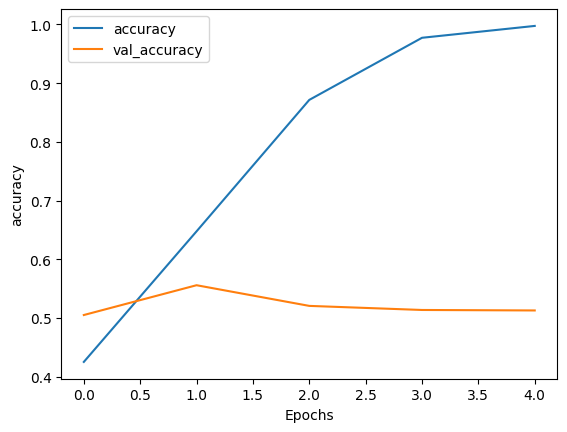

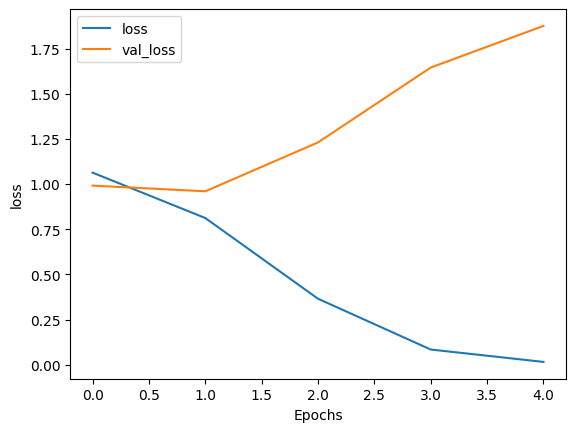

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


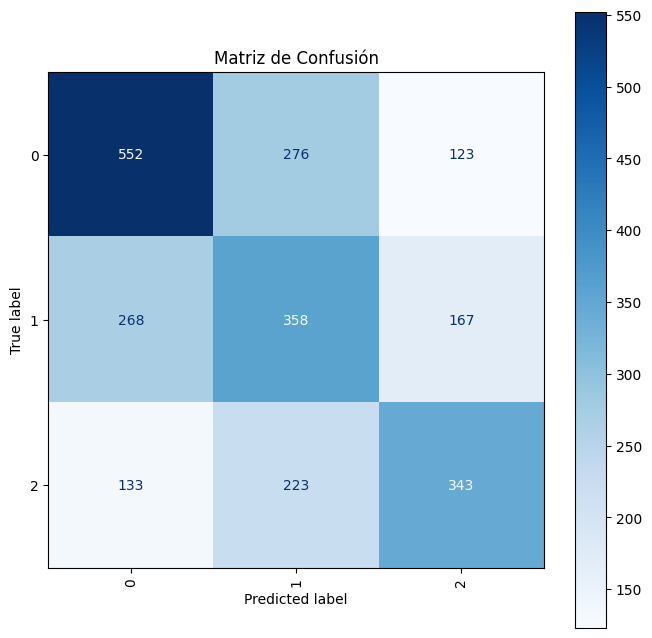

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical

# 1. Obtener las predicciones (probabilidades o logits) del modelo
y_pred_probs = model.predict(x_test)

# 2. Convertir esas predicciones a etiquetas (índice del canal con mayor valor)
y_pred = np.argmax(y_pred_probs, axis=1)

# 3. Asegurarse de que y_test esté en formato de etiquetas enteras
# Si está en one-hot, convertirlo:
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# 4. Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# 5. Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(y_true))
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='vertical')
plt.title("Matriz de Confusión")
plt.show()


#LSTM

In [ ]:
import csv
import tensorflow
tensorflow.config.run_functions_eagerly(True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tqdm import tqdm
import requests
print(tensorflow.__version__)

2.19.0


In [ ]:
import pandas as pd
print('Cargando datos...')
data = pd.read_csv('drive/MyDrive/MeIA_2025/corpusTASS-2020/train.tsv', sep='\t')
data_dev = pd.read_csv('drive/MyDrive/MeIA_2025/corpusTASS-2020/dev.tsv', sep='\t')


# Diccionario de mapeo de etiquetas
mapeo_etiquetas = {'N': 0, 'NEU': 1, 'P': 2}

# Transformación de la columna "etiqueta"
data['etiqueta_num'] = data['etiqueta'].map(mapeo_etiquetas)
data_dev['etiqueta_num'] = data_dev['etiqueta'].map(mapeo_etiquetas)

x_train, y_train = data['texto'], data['etiqueta_num']
x_test, y_test = data_dev['texto'], data_dev['etiqueta_num']
print("listo")


Cargando datos...
listo


In [ ]:
y_train = np.array([y_train[x] for x in range(len(y_train))]);
y_test = np.array([y_test[x] for x in range(len(y_test))]);

In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train, 3)
y_test = tensorflow.keras.utils.to_categorical(y_test, 3)

In [ ]:
x_train[:10]

,texto
0,@morbosaborealis jajajaja... eso es verdad... ...
1,@Adriansoler espero y deseo que el interior te...
2,"comprendo que te molen mis tattoos, pero no te..."
3,"Mi última partida jugada, con Sona support. La..."
4,Tranquilos que con el.dinero de Camacho seguro...
5,"@daniacal aún no, pero si estará jugable en el..."
6,@ragnomuelle Yo a veces hecho de menos mi pelo...
7,A mí nunca me podrán hacer una broma porque no...
8,#feliz septiembre..es bonito retarse..es incre...
9,Este año el Madrid hará triplete y si lo hace ...


## Definimos algunos parámetros de la red

 - vocab_size = cómo de largo queremos que sea nuestro vocabulario. Si es demasiado corto, el rendimiento de la red sería muy pobre pues habría muchos tokens desconocidos. Si es demasiado grande, nuestra red tardará más en entrenar.

 - embedding_dim: Este parámetro nos dice cómo de grandes queremos que sean los vectores que representan cada palabra de nuestro vocabulario. Normalmente, cuanto más grandes sean, mayor 'calidad' en la representación de las mismas.

 - max_length: Debemos definir una longitud máxima de secuencia puesto que nuestra red espera que todas tenga la misma longitud. En nuestro caso, como partimos el dataset en secuencias de 250 palabras, usaremos ese valor.

 - trunc_type: si una secuencia es más larga de 250 palabras la cortamos por detrás (post).

- padding_type = nos dice que en caso de que la secuencia se más corta de 250 tokens en qué parte de ésta se añade los tokens de padding (post = al final).

- oov_tok = `<OOV>` da un valor a las palabras/tokens que estén fuera de esas 10000 como máximo que hemos definido para nuestro vocabulario.


In [ ]:
vocab_size = 1000
embedding_dim = 128
max_length = 40
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [ ]:
train_articles = data['texto'].tolist()
#train_labels = data['etiqueta_num'].tolist()

validation_articles = data_dev['texto'].tolist()
#validation_labels = data_dev['etiqueta_num'].tolist()

print(len(train_articles))
#print(len(train_labels))
print(len(validation_articles))
#print(len(validation_labels))

4802
2443


## Creamos el Tokenizer

Le vamos a decir cuál es el número máximo de palabras, el token para palabras que no estén en el vocabulario y que las pase minúsculas para reducir el tamaño del mismo

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok, lower=True)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[:10])

{'<OOV>': 1,
 'que': 2,
 'de': 3,
 'y': 4,
 'no': 5,
 'a': 6,
 'la': 7,
 'me': 8,
 'el': 9,
 'en': 10}

Tokenizamos nuestro dataset de entrenamiento una vez que ya tenemos nuestro vocabulario listo.

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[0])

[1, 177, 45, 11, 123, 147, 5, 47, 103, 1]


Aplicamos padding a nuestras secuencias de entrenamiento para que todas tengan la misma longitud (para este dataset no es neceario porque las dividimos con la misma longitud, pero en otros casos suele ser útil).

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

10
40
11
40
21
40


In [ ]:
print(train_padded[0])

[  1 177  45  11 123 147   5  47 103   1   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]


Hacemos lo propio con el dataset de validación

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

2443
(2443, 40)


Veamos cómo somos capaces de decodificar una secuencia tokenizada a texto de nuevo gracias al tokenizer que creamos

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[0]))
print('---')
print(train_articles[0])

<OOV> jajajaja eso es verdad aquí no hay uno <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
@morbosaborealis jajajaja... eso es verdad... aquí no hay uno cuerdo 


## Construimos nuestra red neuronal

- Utilizaremos la `Sequential` API de Keras
- Creamos una primera capa de `Embedding`que tiene por tamaño `vocab_size`x `embedding_dim`
- Despues añadimos nuestra capa de recurrencia. En este caso será una `LSTM` bidireccional (aprende de izquerida a derecha y de derecha a izquierda)
- Conectamos la salida de esa capa a una capa `Dense`.
- Por último, conectamos todo a una capa `Dense`con función de activación `sigmoid`ya que nuestro problema de clasificación es binario.

In [ ]:
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Embedding(vocab_size, embedding_dim),
    tensorflow.keras.layers.Dropout(0.1),
    tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(embedding_dim)),
    tensorflow.keras.layers.Dense(embedding_dim, activation='relu'),
    tensorflow.keras.layers.Dropout(0.1),
    tensorflow.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 3
history = model.fit(train_padded, y_train, epochs=num_epochs, validation_data=(validation_padded, y_test), verbose=2)

Epoch 1/3


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


151/151 - 19s - 129ms/step - accuracy: 0.4529 - loss: 1.0447 - val_accuracy: 0.4822 - val_loss: 1.0012
Epoch 2/3
151/151 - 21s - 138ms/step - accuracy: 0.5627 - loss: 0.9103 - val_accuracy: 0.5055 - val_loss: 0.9749
Epoch 3/3
151/151 - 22s - 146ms/step - accuracy: 0.6266 - loss: 0.8250 - val_accuracy: 0.5170 - val_loss: 1.0133


## Visualizamos los resultados

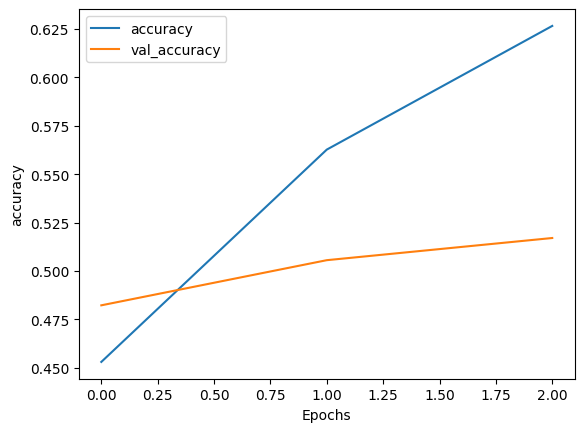

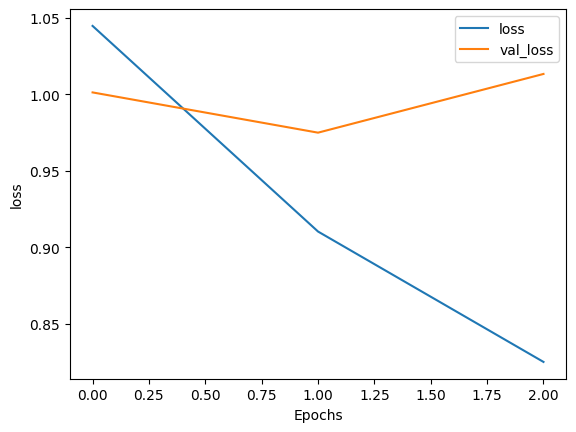

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Probemos nuestro modelo

In [ ]:
validation_articles[50], y_test[50]

('Ojalá alguien llamandome bonito o precioso  sad', array([1., 0., 0.]))

In [ ]:
def get_class(pred):

  return np.where(pred[0] == max(pred[0]))[0][0]

In [ ]:

txt = ['''
Bien bien, me gusta el PLN
''']
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
print(pred)

posiblesSalidas = dict();
posiblesSalidas[0] = "Parece un texto negativo "
posiblesSalidas[1] = "Parece un texto neutro "
posiblesSalidas[2] = "Parece un texto positivo "

print(posiblesSalidas[get_class(pred)]);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[[0.3413985  0.2447852  0.41381624]]
Parece un texto positivo 


#RNN y GRU

In [ ]:
import tensorflow as tf

model_rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [ ]:
model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 3
history = model_rnn.fit(train_padded, y_train, epochs=num_epochs, validation_data=(validation_padded, y_test), verbose=2)

Epoch 1/3
151/151 - 77s - 510ms/step - accuracy: 0.3746 - loss: 1.1246 - val_accuracy: 0.3893 - val_loss: 1.0995
Epoch 2/3
151/151 - 77s - 507ms/step - accuracy: 0.4246 - loss: 1.0674 - val_accuracy: 0.4519 - val_loss: 1.0460
Epoch 3/3
151/151 - 80s - 527ms/step - accuracy: 0.5716 - loss: 0.9110 - val_accuracy: 0.4441 - val_loss: 1.0762


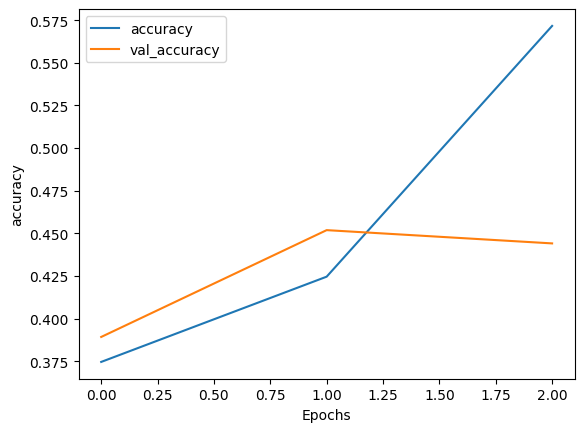

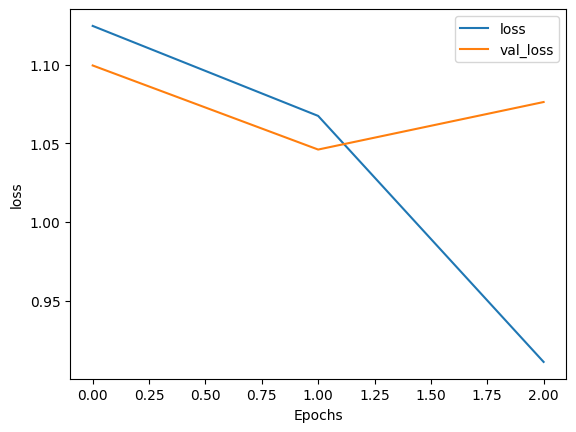

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
import tensorflow as tf

model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [ ]:
model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
num_epochs = 3
history = model_gru.fit(train_padded, y_train, epochs=num_epochs, validation_data=(validation_padded, y_test), verbose=2)

Epoch 1/3
151/151 - 19s - 128ms/step - accuracy: 0.4342 - loss: 1.0523 - val_accuracy: 0.4069 - val_loss: 1.3655
Epoch 2/3
151/151 - 18s - 122ms/step - accuracy: 0.5544 - loss: 0.9330 - val_accuracy: 0.5006 - val_loss: 0.9963
Epoch 3/3
151/151 - 19s - 127ms/step - accuracy: 0.6160 - loss: 0.8401 - val_accuracy: 0.5100 - val_loss: 1.0095


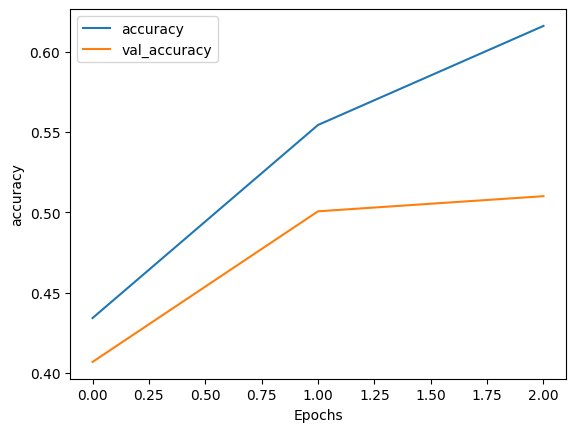

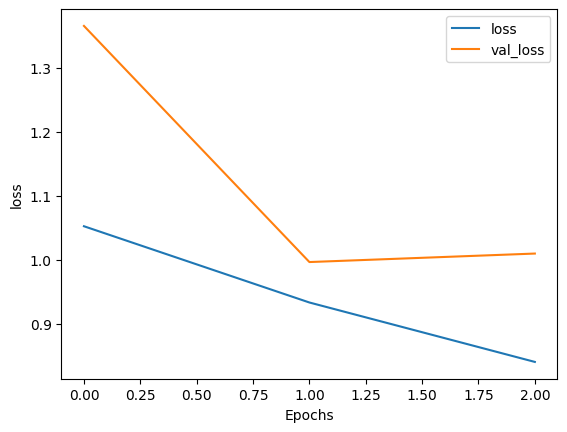

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Podemos combinar?

In [ ]:
# -*- coding: utf-8 -*-
# CNN -> BiLSTM para clasificación de sentimientos (TASS 2020)
import os, random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, Sequential

# ========= Semillas para reproducibilidad (opcional) =========
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ========= Carga de datos =========
print('Cargando datos...')
train_path = 'drive/MyDrive/MeIA_2025/corpusTASS-2020/train.tsv'
dev_path   = 'drive/MyDrive/MeIA_2025/corpusTASS-2020/dev.tsv'

data = pd.read_csv(train_path, sep='\t')
data_dev = pd.read_csv(dev_path, sep='\t')

# Mapear etiquetas a {0,1,2}
mapeo_etiquetas = {'N': 0, 'NEU': 1, 'P': 2}
data['etiqueta_num'] = data['etiqueta'].map(mapeo_etiquetas)
data_dev['etiqueta_num'] = data_dev['etiqueta'].map(mapeo_etiquetas)

x_train_texts = data['texto'].astype(str).tolist()
y_train = data['etiqueta_num'].values
x_test_texts  = data_dev['texto'].astype(str).tolist()
y_test  = data_dev['etiqueta_num'].values

print(len(x_train_texts), 'ejemplos de entrenamiento')
print(len(x_test_texts), 'ejemplos de prueba')

# ========= Tokenización y secuencias =========
# Hiperparámetros de texto
vocab_size     = 30000     # tamaño del vocabulario
max_len        = 100       # longitud máxima de secuencia
oov_token      = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(x_train_texts)

X_train = tokenizer.texts_to_sequences(x_train_texts)
X_test  = tokenizer.texts_to_sequences(x_test_texts)

X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test  = pad_sequences(X_test,  maxlen=max_len, padding='post', truncating='post')

# One-hot para categorical_crossentropy (3 clases)
num_classes = 3
y_train_oh = to_categorical(y_train, num_classes=num_classes)
y_test_oh  = to_categorical(y_test,  num_classes=num_classes)

# ========= Modelo CNN -> BiLSTM =========
embedding_dim  = 128
conv_filters   = 128
kernel_size    = 3
pool_size      = 2
lstm_units     = 128
drop_rate      = 0.1

model = Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    layers.Dropout(drop_rate),

    # --- Bloque convolucional ---
    layers.Conv1D(filters=conv_filters, kernel_size=kernel_size, padding='same', activation='relu'),
    layers.MaxPooling1D(pool_size=pool_size),

    # --- Recurrente sobre mapas de activación (aún conservan la dimensión temporal) ---
    layers.Bidirectional(layers.LSTM(lstm_units)),

    # --- Clasificación ---
    layers.Dense(embedding_dim, activation='relu'),
    layers.Dropout(drop_rate),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# ========= Entrenamiento =========
batch_size = 64
epochs = 10
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)
]

history = model.fit(
    X_train, y_train_oh,
    validation_data=(X_test, y_test_oh),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks,
    verbose=1
)

# ========= Evaluación =========
test_loss, test_acc = model.evaluate(X_test, y_test_oh, verbose=0)
print(f"\nAccuracy de prueba: {test_acc:.4f}  |  Pérdida: {test_loss:.4f}")

# ========= (Opcional) Métricas adicionales =========
from sklearn.metrics import classification_report, confusion_matrix

y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['N', 'NEU', 'P']))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Cargando datos...
4802 ejemplos de entrenamiento
2443 ejemplos de prueba


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


71/76 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.3784 - loss: 1.0931